In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv('iris.data', names=['f1','f2','f3','f4','iris'])
data.head(90)


,f1,f2,f3,f4,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor


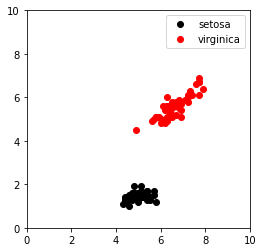

In [37]:
x1 = data['f1']
x2 = data['f3']
Y = data['iris']

#Mascara para clases

class_0 = Y == 'Iris-setosa' 
class_1 = Y == 'Iris-virginica' 

#-- Graficamos los puntos con sus correspondientes clases
fig = plt.figure(figsize=(4,4))
plt.plot(x1[class_0],x2[class_0],'o', c='black', label='setosa')
plt.plot(x1[class_1],x2[class_1],'o', c='red', label='virginica')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()

In [75]:
for i in range(len(Y)):
  if Y[i] == 'Iris-setosa':
      Y[i] = 0
  elif Y[i] == 'Iris-versicolor':
      Y[i] = 1
  elif Y[i] == 'Iris-virginica':
      Y[i]= 2

In [67]:
Y[10]

0

In [62]:

#funcion de percepton
def y(x):
 return -(b + w_1*x)/w_2

 #funcion de activacion. sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

In [68]:
Y[9]

0

In [72]:
type(Y[0])

int

Epoch [1/15], bias: 25.0, w1: 165.64999999999995, w2: 140.45


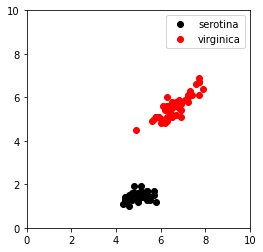

Epoch [2/15], bias: 25.0, w1: 205.19999999999987, w2: 242.6500000000001


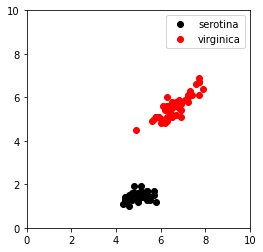

Epoch [3/15], bias: 25.0, w1: 244.74999999999974, w2: 344.85000000000036


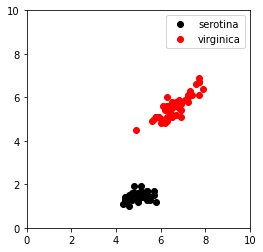

Epoch [4/15], bias: 25.0, w1: 284.29999999999967, w2: 447.0500000000005


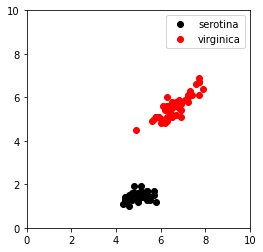

Epoch [5/15], bias: 25.0, w1: 323.84999999999957, w2: 549.2500000000006


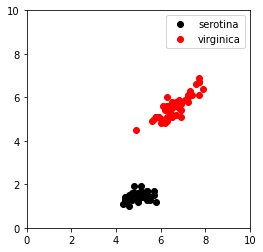

Epoch [6/15], bias: 25.0, w1: 363.3999999999997, w2: 651.4499999999999


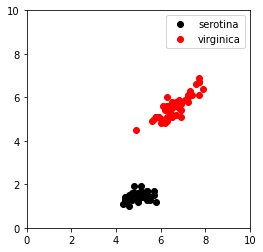

Epoch [7/15], bias: 25.0, w1: 402.9499999999997, w2: 753.6499999999993


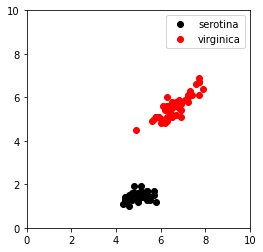

Epoch [8/15], bias: 25.0, w1: 442.4999999999997, w2: 855.8499999999987


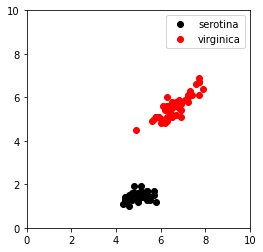

Epoch [9/15], bias: 25.0, w1: 482.0499999999997, w2: 958.049999999998


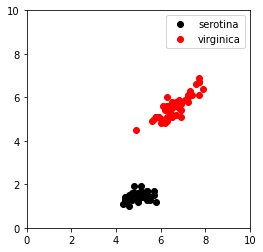

Epoch [10/15], bias: 25.0, w1: 521.5999999999998, w2: 1060.2499999999973


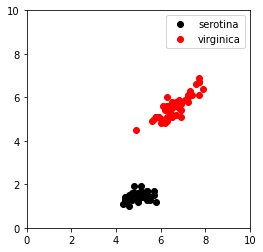

Epoch [11/15], bias: 25.0, w1: 561.15, w2: 1162.4499999999966


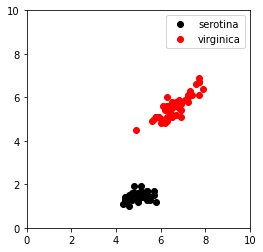

Epoch [12/15], bias: 25.0, w1: 600.7000000000003, w2: 1264.649999999996


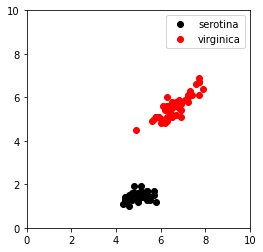

Epoch [13/15], bias: 25.0, w1: 640.2500000000007, w2: 1366.8499999999954


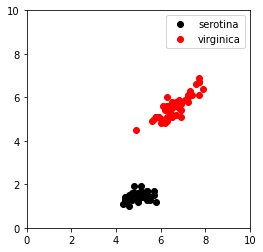

Epoch [14/15], bias: 25.0, w1: 679.8000000000011, w2: 1469.0499999999947


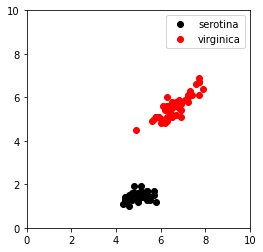

Epoch [15/15], bias: 25.0, w1: 719.3500000000015, w2: 1571.249999999994


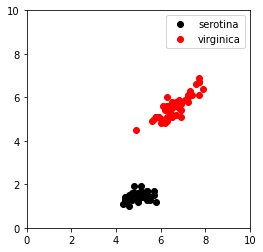

In [81]:
#-- Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 15 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Esta es la función nuestro perceptron encontrará al final de todas las épocas
def y(x):
 return -(b + w_1*x)/w_2

# Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(x1,x2,Y):
    
    # Función de Suma
    z = i*w_1 + j*w_2 + b

    # Función de Activación
    sig_z = act(z)

    # Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
  
    # Calculamos el error
    error = k - out

    # Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

  fig = plt.figure(figsize=(4,4))
  plt.plot(x1[class_0],x2[class_0],'o', c='black', label='serotina')
  plt.plot(x1[class_1],x2[class_1],'o', c='red', label='virginica')
  plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green',)
  plt.xlim(0,10)
  plt.ylim(0,10)
  plt.legend()
  plt.show()

Para MLP

In [82]:
#--- Dividimos nuestro dataset en Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x1,Y)

In [83]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(2, 2), solver='adam', learning_rate_init=0.1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
#model.fit(X_train,Y_train)
#Y_pred = model.predict(X_test)

In [ ]:
#--- Evaluamos el modelo con el accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)